## Task 2 - Let’s read the CSV file with some more analytical and statistical analysis like head(), describe() etc

### Importing Necesary dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from scipy import stats
import warnings,os
import re



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Justice_Combined.csv')
df.head()

,author,date,Comment,like_count,reply_count,comment_length
0,@FaadaumoCabdulaahi,2024-03-27T07:57:07Z,😂😂😂😂😂,0,0,5
1,@mohamuda.xamaraawi5553,2024-03-27T07:51:53Z,Shamuuri hadeer waa oa caansan yahay garsoorah...,0,0,73
2,@CabdisalaanMcali,2024-03-27T01:28:17Z,Kkkkkk kkkkkkkkk,0,0,16
3,@CabdisalaanMcali,2024-03-27T01:27:20Z,Kkkkkk,0,0,6
4,@AxmedDiriye-ek1tg,2024-03-23T10:34:08Z,Shamuure wlhi genesis genesi dhalay,0,0,35


In [3]:
df.describe()

,like_count,reply_count,comment_length
count,4777.000000,4777.000000,4777.000000
mean,1.738539,0.194264,80.915009
std,7.449361,0.920605,114.706956
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,24.000000
50%,0.000000,0.000000,50.000000
75%,1.000000,0.000000,96.000000
max,244.000000,23.000000,1822.000000


In [4]:
len(df)

4777

## Task 3 - Let’s clean the data by removing the extra data and outliers, dropping or filling the missing values, etc. Create the final dataframe for further analysis

### Cheking For duplicate values

In [5]:
df.duplicated().sum()

142

### Droping Duplicate Values

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

### Check for missing values

In [8]:
df.isna().sum()

author            0
date              0
Comment           0
like_count        0
reply_count       0
comment_length    0
dtype: int64

## Task 4: Lets analyze and visualize the distribution of post length and word counts?

#### Calculate word count

In [9]:
word_count = df['word_count'] = df['Comment'].apply(lambda x: len(x.split()))

In [10]:
word_count

0        1
1       11
2        2
3        1
4        5
        ..
4772     4
4773    12
4774    56
4775     8
4776     8
Name: Comment, Length: 4635, dtype: int64

In [11]:
df.head()

,author,date,Comment,like_count,reply_count,comment_length,word_count
0,@FaadaumoCabdulaahi,2024-03-27T07:57:07Z,😂😂😂😂😂,0,0,5,1
1,@mohamuda.xamaraawi5553,2024-03-27T07:51:53Z,Shamuuri hadeer waa oa caansan yahay garsoorah...,0,0,73,11
2,@CabdisalaanMcali,2024-03-27T01:28:17Z,Kkkkkk kkkkkkkkk,0,0,16,2
3,@CabdisalaanMcali,2024-03-27T01:27:20Z,Kkkkkk,0,0,6,1
4,@AxmedDiriye-ek1tg,2024-03-23T10:34:08Z,Shamuure wlhi genesis genesi dhalay,0,0,35,5


## Summary Statistics
### Before visualizing, it's often useful to look at summary statistics to get a sense of the distribution

In [12]:
# Display summary statistics for post length and word count
summary_stats = df[['comment_length', 'word_count']].describe()
print(summary_stats)


       comment_length   word_count
count     4635.000000  4635.000000
mean        79.396548    12.654800
std        109.936178    17.886925
min          1.000000     1.000000
25%         24.000000     4.000000
50%         49.000000     8.000000
75%         95.000000    15.000000
max       1822.000000   302.000000


## Visualizing the Distribution

Text(0.5, 1.0, 'Distribution of Comment Lengths')

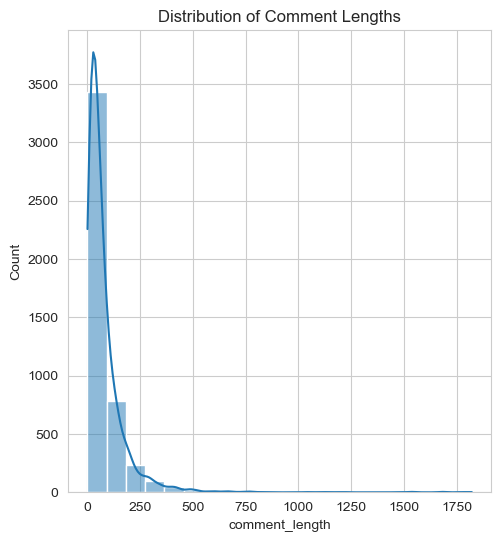

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of post lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['comment_length'], kde=True, bins=20)
plt.title('Distribution of Comment Lengths')


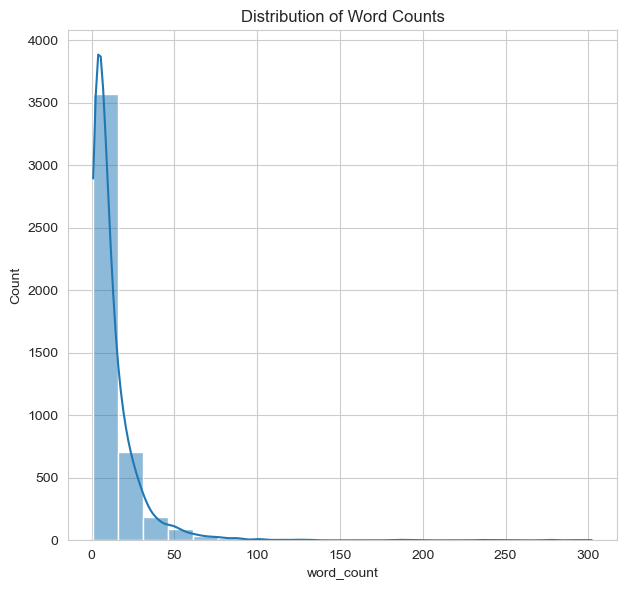

In [14]:
# Plot distribution of word counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df['word_count'], kde=True, bins=20)
plt.title('Distribution of Word Counts')

plt.tight_layout()
plt.show()

## Task 5 - Let's analyze and visualize the most trending comments

###  the most trending comments Sort by Likes and Get Top 10

In [15]:
df.sort_values(by='like_count', ascending=False)[0:5]

,author,date,Comment,like_count,reply_count,comment_length,word_count
4248,@jibaabaofficial1060,2024-03-06T09:46:46Z,Yaaa iila farxey asxaabeey taag farta,244,23,37,6
2990,@user-xl7dv9ep1j,2024-02-26T07:41:18Z,Nabi maxamad gadaasha dumarka cadaalad mahelin,152,16,47,6
2927,@salwaxasan2594,2024-02-26T08:37:15Z,Luul janatul fardos ban kuu rajeynayaa xabibti...,146,5,51,8
2660,@user-jc2qp9ut8m,2024-03-06T09:44:27Z,"If somalia continues like this, there will be ...",124,8,58,11
3005,@Nimcaanaxmtth805,2024-02-26T07:38:24Z,😢😢😢😢😢😢😢 ehelka Walasheen luuul iyo caruurteeda...,102,3,98,13


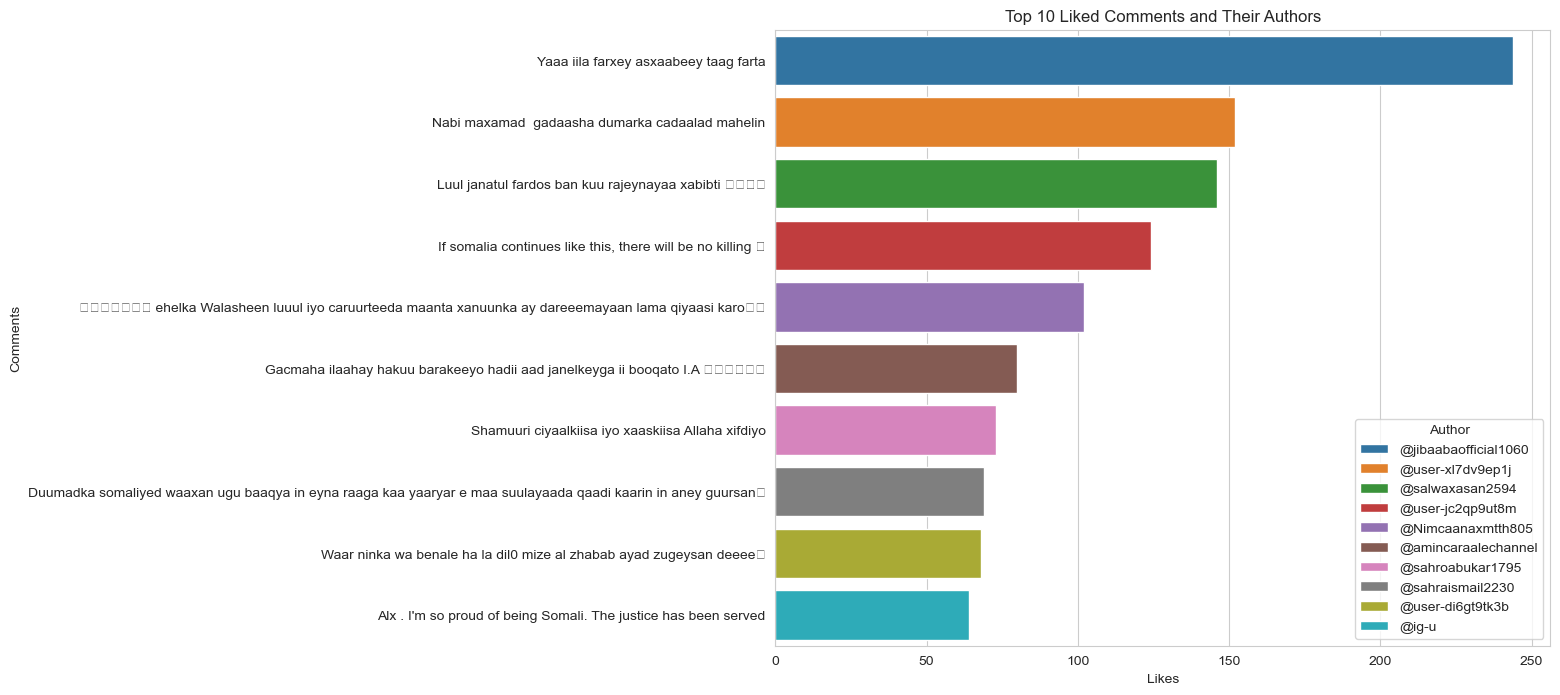

In [16]:
# Extracting the information for visualization
top_liked_comments_users = df[['author', 'Comment', 'like_count']].sort_values(by='like_count', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='like_count', y='Comment', hue='author', dodge=False, data=top_liked_comments_users)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend(title='Author', loc='lower right')
plt.show()


###  the most trending comments Sort by replies and Get Top 10


In [17]:
df.sort_values(by='reply_count', ascending=False)[0:5]

,author,date,Comment,like_count,reply_count,comment_length,word_count
4248,@jibaabaofficial1060,2024-03-06T09:46:46Z,Yaaa iila farxey asxaabeey taag farta,244,23,37,6
2315,@sahraismail2230,2024-02-26T10:39:54Z,Duumadka somaliyed waaxan ugu baaqya in eyna r...,69,18,109,18
2990,@user-xl7dv9ep1j,2024-02-26T07:41:18Z,Nabi maxamad gadaasha dumarka cadaalad mahelin,152,16,47,6
3549,@user-umuAli,2024-02-21T12:23:13Z,Dadkayga somaliyed waxaan idinka codsanayaa wa...,54,15,414,62
1499,@elmimohamedelmi,2024-02-02T13:19:41Z,Nacala mooryan Habargidir .,5,12,27,4


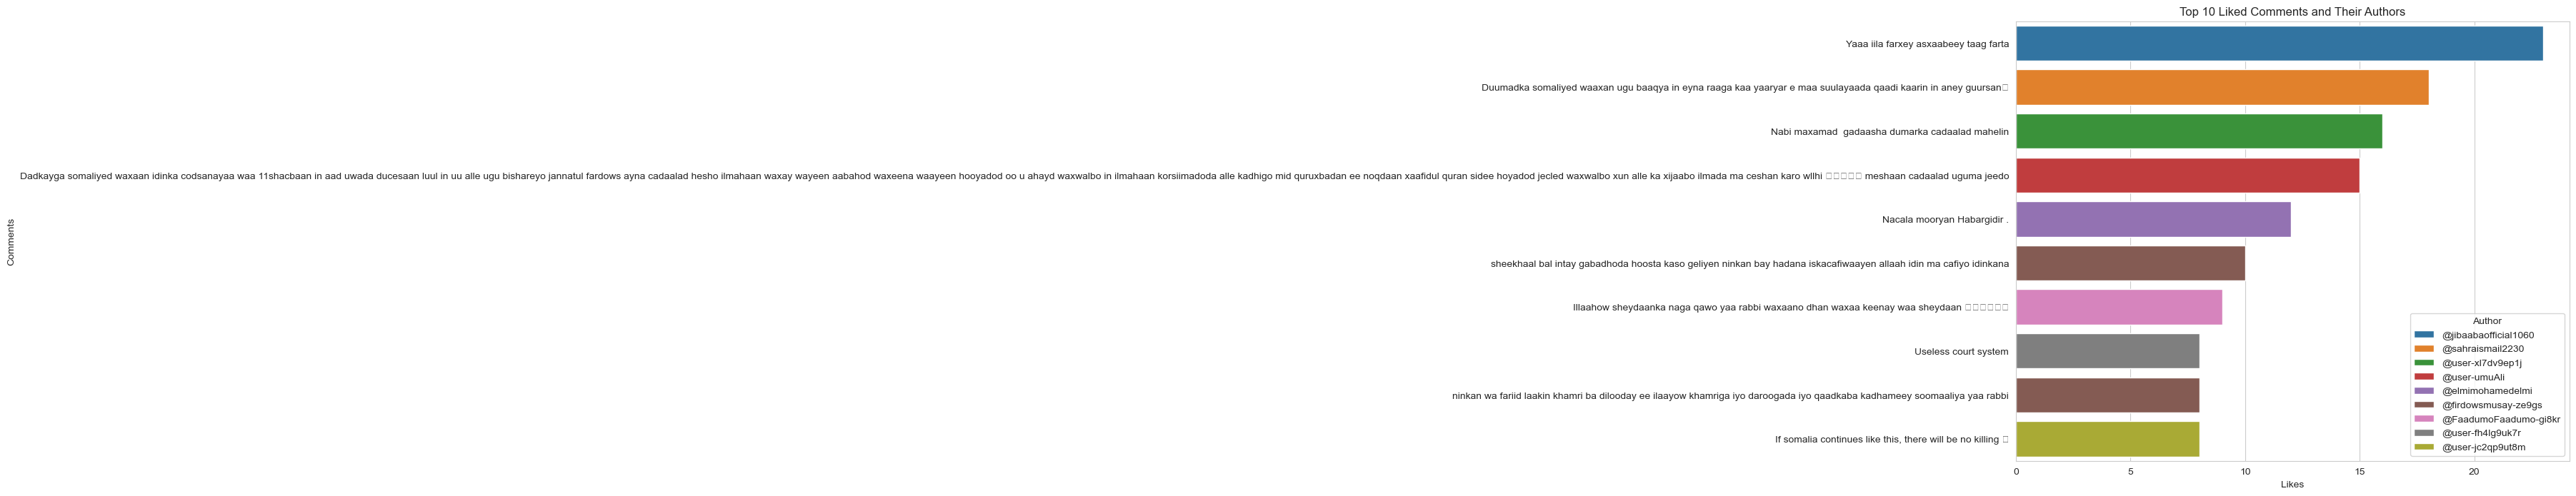

In [18]:
# Extracting the information for visualization
top_replied_comments_users = df[['author', 'Comment', 'reply_count']].sort_values(by='reply_count', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(x='reply_count', y='Comment', hue='author', dodge=False, data=top_replied_comments_users)
plt.title('Top 10 Liked Comments and Their Authors')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend(title='Author', loc='lower right')
plt.show()


## Task 6 - Let's analyze and visualize the top 10 users by number of comments

### Unique Authors

In [19]:
unique_authors = df['author'].nunique()
unique_authors

3268

In [20]:
# Author analysis
top_contributors = df['author'].value_counts().head(10)
top_contributors

author
@firdowsmusay-ze9gs    30
@Jamiilo21             19
@mohamedshardi6198     16
@user-pi3vr1bi8b       12
@user-jp9mu1of2r       12
@hanefa283             12
@safiyakulmiye7460     12
@user-ou5qw7bg4r       11
@rukiaabdulle420       11
@user-fl3ko1jv2j       10
Name: count, dtype: int64

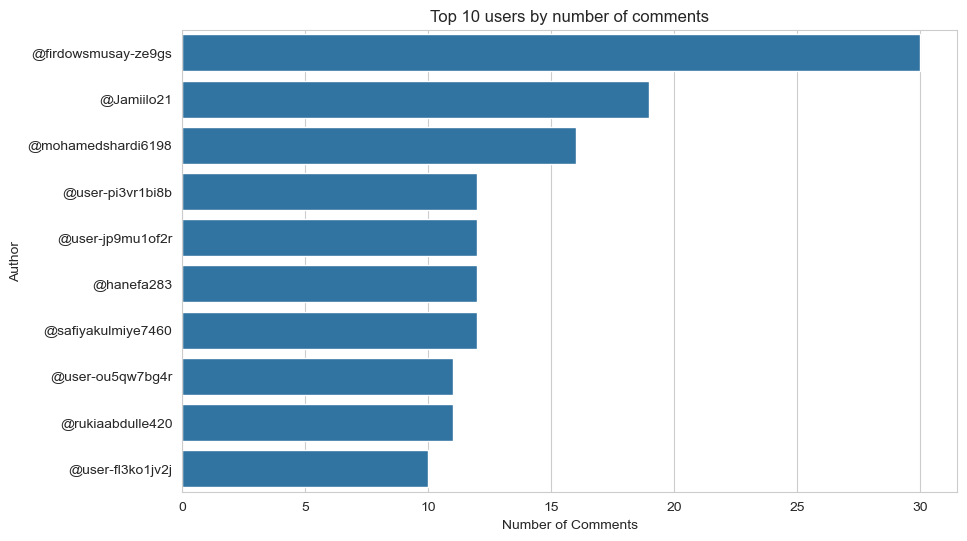

In [21]:
# Top Contributors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_contributors.values, y=top_contributors.index)
plt.title('Top 10 users by number of comments')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()

## Task 7 - Let's visualize the prevalent words in the comments using WordCloud

In [22]:

# defining my own list completely
my_stopwords = {'ku', 'iyo', 'uu', 'ha', 'ma', 'laga', 'ugu', 'waa', 'in', 'ee', 'aa', 'u', 'scw', 'si',
                'inay', 'la', 'ah', 'ka', 'ayaa', 'iska', 'wax', 'oo', 'soo', 'ayuu', 'bal', 'uga', 'aan',
                'wa', 'i', 'buu', 'inu', 'loo', 'waxaa', 'waxaan', 'ah', 'lama', 'maxay', 'tahay',
               'a', 'lagu', 'maxaa', 'inuu', 'wada', 'wuxuu', 'hala', 'e', 'waxan', 'sida', 'aad', 'kale', 
                'ah', 'wuu', 'ama', 'sii', 'hadii', 'ay' 'aya', 'siduu', 'yaa', 'ayu', 'way', 'naga', 'war',
               'ba', 'aha', 'iga', 'baa', 'ay', 'muxuu', 'maa', 'is', 'ayay', 'so', 'laha', 'haka', 'aya', 'wuxu',
               'haa', 'he', 'ilaa', 'hada', 'mida', 'may', 'waxa', 'waan', 'hadaad', 'waxay', 'kuma', 'wixii', 
               'inaad', 'og', 'sow', 'inta', 'haku', 'lahaa', 'inay', 'alx', 'kugu', 'yahay', 'kaa', 'miyaa',
               'miya', 'ayey', 'maxa', 'haduu', 'leh', 'ayan', 'hadi', 'iney', 'isku', 'lkn', 'alle', 'na', 'kuu'}



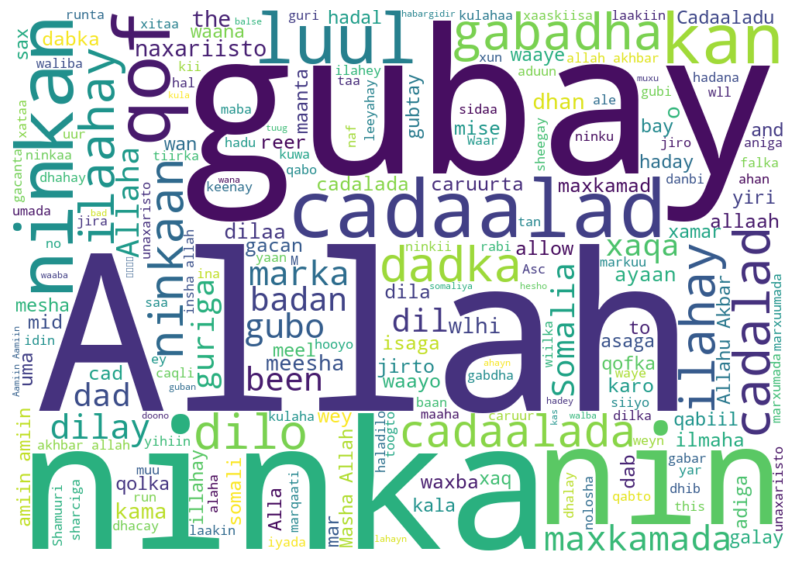

In [23]:
# Word cloud for comments
text = ' '.join(comment for comment in df.Comment)
stopwords = set(my_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=700,
            min_font_size = 10).generate(text) 

plt.figure(figsize=(10, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 8 - Let’s visualize in what STATE/COUNTRY were the top posts posted that mention your TOPIC

### unfortunately YouTube's Data API restricts access to directly access to the location data of its users due to their privacy and policy reasons.

## Task 9 - Let’s visualize on what day(s) of the month was your TOPIC talked about the most on the selected social media platform

### checking my data types to see if date column is datetime

In [24]:
df.dtypes

author            object
date              object
Comment           object
like_count         int64
reply_count        int64
comment_length     int64
word_count         int64
dtype: object

In [25]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [26]:
# Verify the conversion by checking the data type again
print(df['date'].dtype)

datetime64[ns, UTC]


In [27]:
df.dtypes

author                         object
date              datetime64[ns, UTC]
Comment                        object
like_count                      int64
reply_count                     int64
comment_length                  int64
word_count                      int64
dtype: object

### Extracting Day of the Month

In [28]:
df['day_of_month'] = df['date'].dt.day

### Aggregate Data by Day of the Month
#### Now, count how many comments were made on each day of the month. This involves grouping the 'data by the day_of_month' and counting the number of comments.

In [29]:
comments_by_day = df.groupby('day_of_month')['Comment'].count()
comments_by_day

day_of_month
1       51
2       94
3       78
4       32
5       21
6      902
7       62
8      280
9       56
10      28
11       9
12       4
13       9
14      12
15       4
16       3
17       3
18       2
21     779
22     159
23      63
24      41
25      29
26    1351
27     345
28     125
29      93
Name: Comment, dtype: int64

### Visualize the Data
#### Finally, use a bar chart to visualize the number of comments per day of the month.

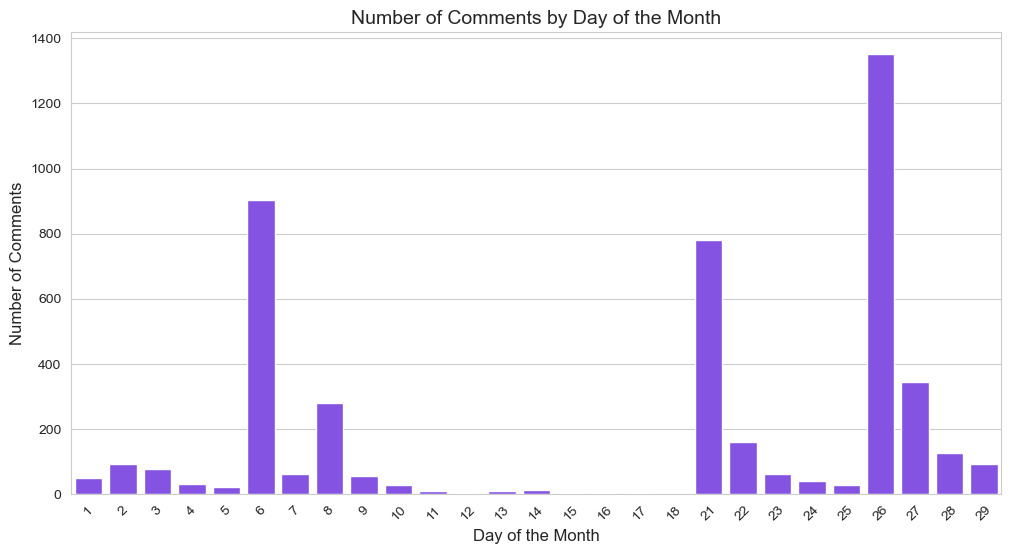

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=comments_by_day.index, y=comments_by_day.values, color='#7D3CF8')  # Electric Purple
plt.title('Number of Comments by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45) # Helps with readability if there are many days
plt.show()



## Task 10: Let’s collect 3,000 statements across Somali public pages on Social Media Outlet and annotate them into three sentiment labels:- Positive-wanaag, Negative-xumaan or Neutral-dhexdhexaad

In [31]:
Sentiments = pd.read_excel('Sentimentss.xlsx')
Sentiments.head()

,Statement,Label
0,naxariis,1
1,jaceyl,1
2,amaan,1
3,soo jiidasho leh,1
4,raali galin,1


In [32]:
Sentiments.duplicated().sum()

52

In [33]:
Sentiments.drop_duplicates(inplace=True)

In [34]:
Sentiments.duplicated().sum()

0

In [35]:
Sentiments.isna().sum()

Statement    1
Label        0
dtype: int64

In [36]:
 def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [37]:
def words_with_more_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>3])

In [38]:
import string

def remove_punctuation(x):
    # Check if x is a string instance
    if isinstance(x, str):
        # If x is a string, remove punctuation
        return x.translate(str.maketrans('', '', string.punctuation))
    else:
        # If x is not a string (e.g., NaN or a number), return it unchanged
        return x

# Assuming Sentiments is your DataFrame and 'Statement' is a column in it
Sentiments['Statement'] = Sentiments['Statement'].apply(lambda x: remove_punctuation(x))

# Display the first 10 rows of the DataFrame
Sentiments.head(10)


,Statement,Label
0,naxariis,1
1,jaceyl,1
2,amaan,1
3,soo jiidasho leh,1
4,raali galin,1
5,hambalyo,1
6,faraxad,1
7,qurux,1
8,quruxsan,1
9,la jecel yahay,1


In [39]:
# Convert non-string values to strings
Sentiments['Statement'] = Sentiments['Statement'].astype(str)

In [40]:
Sentiments['Statement']=Sentiments['Statement'].apply(lambda x:remove_punctuation(x))
Sentiments['Statement']=Sentiments['Statement'].apply(lambda x:words_with_more_than_three_chars(x))
Sentiments['Statement']=Sentiments['Statement'].apply(lambda x: ' '.join([word for word in x.split()]))


In [41]:
Sentiments['Sentiment'] = Sentiments['Label'].map({1:'Wanaag',2:'Dhexdhexaad',3:'Xumaan'})
Sentiments.tail()

,Statement,Label,Sentiment
3056,nacalad nalacad dhashay tahay,3,Xumaan
3057,caqligaa kuugu,3,Xumaan
3058,doqon tahay,3,Xumaan
3059,magaalad naso,3,Xumaan
3060,garato tahay,3,Xumaan


In [42]:
Sentiments['Sentiment'] = Sentiments['Label'].map({1:'Possitive-Wanaag',2:'Neutral-Dhexdhexaad',3:'Negative-Xumaan'})
Sentiments.tail()

,Statement,Label,Sentiment
3056,nacalad nalacad dhashay tahay,3,Negative-Xumaan
3057,caqligaa kuugu,3,Negative-Xumaan
3058,doqon tahay,3,Negative-Xumaan
3059,magaalad naso,3,Negative-Xumaan
3060,garato tahay,3,Negative-Xumaan


<Axes: title={'center': 'Target class'}, xlabel='Sentiment'>

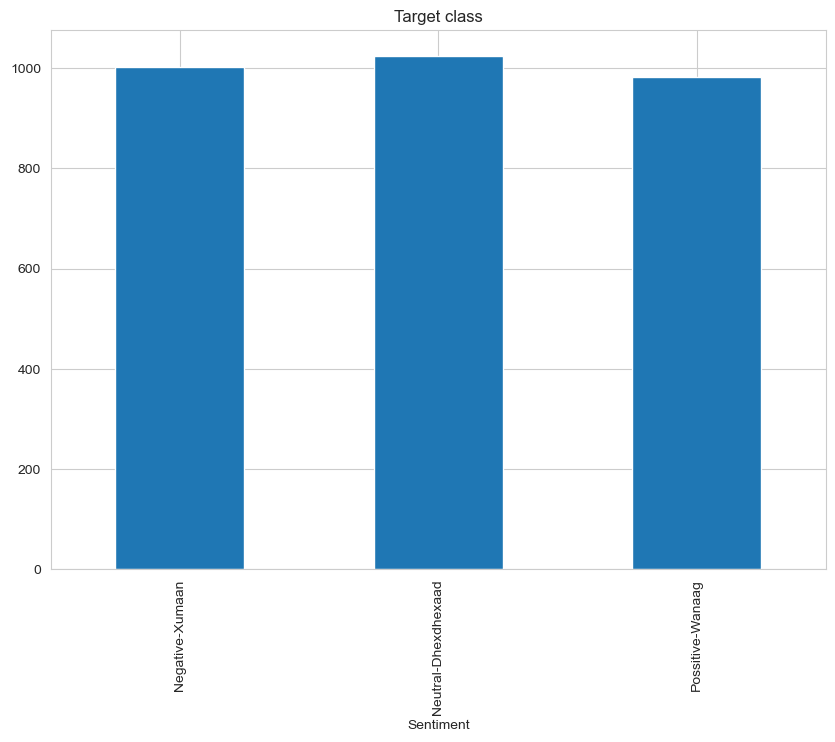

In [43]:
Sentiments.groupby('Sentiment')['Sentiment'].count().plot(kind='bar',title='Target class',figsize=(10,7))

In [44]:
# Convert stop_words_to_lower to a set for faster membership testing
stop_words_set = set(my_stopwords)

# Define a function to clean and process each comment
def process_comment(comment):
    review = re.sub('[^a-zA-Z]', ' ', str(comment))
    review = review.lower().split()
    review = [word for word in review if word not in stop_words_set]
    return ' '.join(review)

# Apply the function to each comment in the DataFrame
Sentiments['ProcessedStatement'] = Sentiments['Statement'].apply(process_comment)


In [45]:
Sentiments.head()

,Statement,Label,Sentiment,ProcessedStatement
0,naxariis,1,Possitive-Wanaag,naxariis
1,jaceyl,1,Possitive-Wanaag,jaceyl
2,amaan,1,Possitive-Wanaag,amaan
3,jiidasho,1,Possitive-Wanaag,jiidasho
4,raali galin,1,Possitive-Wanaag,raali galin


# Task 11 - Let’s train a sentiment analysis model using machine learning

In [46]:
X = Sentiments['ProcessedStatement']  # The column containing text data
y =  Sentiments['Sentiment']  # The column containing sentiment labels

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:


# Define a machine learning pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True)),
    ('classifier', LogisticRegression(random_state=42)),
])



In [49]:
# Train the model with the corrected data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=42))])

In [50]:
# Convert stop_words_to_lower to a set for faster membership testing
stop_words_set = set(my_stopwords)

# Define a function to clean and process each comment
def process_comment(comment):
    review = re.sub('[^a-zA-Z]', ' ', str(comment))
    review = review.lower().split()
    review = [word for word in review if word not in stop_words_set]
    return ' '.join(review)

# Apply the function to each comment in the DataFrame
df['ProcessedComment'] = df['Comment'].apply(process_comment)


# Task 12 - Let’s now apply the trained model on the selected topic textual contents in order to predict their sentiments

## Now, we can predict with confidence that the pipeline is fitted

In [51]:
# Now, you can predict with confidence that the pipeline is fitted
predicted_sentiments = pipeline.predict(df['ProcessedComment'])
df['Predicted Sentiment'] = predicted_sentiments

# Displaying the original comments with their predicted sentiments
print(df[['ProcessedComment', 'Predicted Sentiment']].head())

                                    ProcessedComment  Predicted Sentiment
0                                                     Neutral-Dhexdhexaad
1  shamuuri hadeer oa caansan garsooraha daawanay...  Neutral-Dhexdhexaad
2                                   kkkkkk kkkkkkkkk  Neutral-Dhexdhexaad
3                                             kkkkkk  Neutral-Dhexdhexaad
4                shamuure wlhi genesis genesi dhalay      Negative-Xumaan


## Applying  the trained model to predict sentiments of the selected topic textual contents

In [52]:
# Applying the trained model to predict sentiments of the selected topic textual contents
predicted_sentiments = pipeline.predict(df['ProcessedComment'])

# Add the predictions to the original dataframe for review
df['Predicted Sentiment'] = predicted_sentiments

# Displaying the original comments with their predicted sentiments
print(df[['ProcessedComment', 'ProcessedComment']].head())


                                    ProcessedComment  \
0                                                      
1  shamuuri hadeer oa caansan garsooraha daawanay...   
2                                   kkkkkk kkkkkkkkk   
3                                             kkkkkk   
4                shamuure wlhi genesis genesi dhalay   

                                    ProcessedComment  
0                                                     
1  shamuuri hadeer oa caansan garsooraha daawanay...  
2                                   kkkkkk kkkkkkkkk  
3                                             kkkkkk  
4                shamuure wlhi genesis genesi dhalay  


In [53]:
df.head()

,author,date,Comment,like_count,reply_count,comment_length,word_count,day_of_month,ProcessedComment,Predicted Sentiment
0,@FaadaumoCabdulaahi,2024-03-27 07:57:07+00:00,😂😂😂😂😂,0,0,5,1,27,,Neutral-Dhexdhexaad
1,@mohamuda.xamaraawi5553,2024-03-27 07:51:53+00:00,Shamuuri hadeer waa oa caansan yahay garsoorah...,0,0,73,11,27,shamuuri hadeer oa caansan garsooraha daawanay...,Neutral-Dhexdhexaad
2,@CabdisalaanMcali,2024-03-27 01:28:17+00:00,Kkkkkk kkkkkkkkk,0,0,16,2,27,kkkkkk kkkkkkkkk,Neutral-Dhexdhexaad
3,@CabdisalaanMcali,2024-03-27 01:27:20+00:00,Kkkkkk,0,0,6,1,27,kkkkkk,Neutral-Dhexdhexaad
4,@AxmedDiriye-ek1tg,2024-03-23 10:34:08+00:00,Shamuure wlhi genesis genesi dhalay,0,0,35,5,23,shamuure wlhi genesis genesi dhalay,Negative-Xumaan


# Task 13 - Let’s visualize the sentiment percentages (positive, negative, neutral) for the selected topic

## before the visualization let's calculating sentiment distribution in the predicted sentiments

In [54]:
# Calculating sentiment distribution in the predicted sentiments
predicted_sentiments_distribution = df['Predicted Sentiment'].value_counts(normalize=True) * 100
predicted_sentiments_distribution

Predicted Sentiment
Neutral-Dhexdhexaad    54.261057
Possitive-Wanaag       29.600863
Negative-Xumaan        16.138080
Name: proportion, dtype: float64

## Visualizing the Predicted sentiment

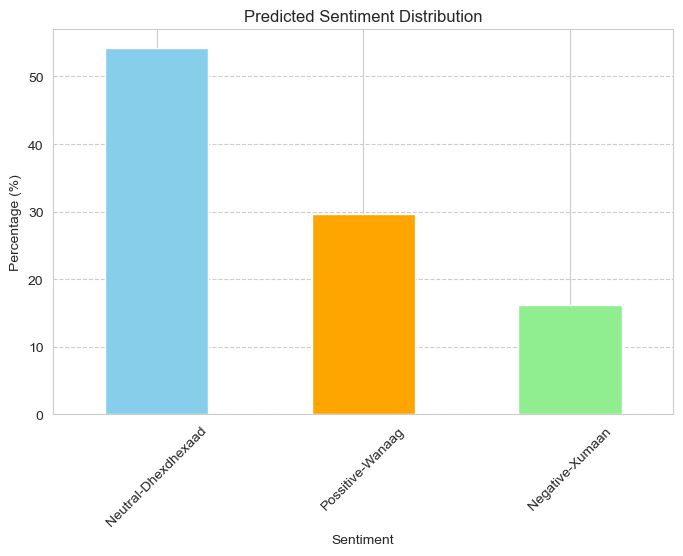

In [55]:

# Plotting
plt.figure(figsize=(8, 5))
predicted_sentiments_distribution.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


# Task 14 - Let’s visualize the top positive keywords associated with the selected topic

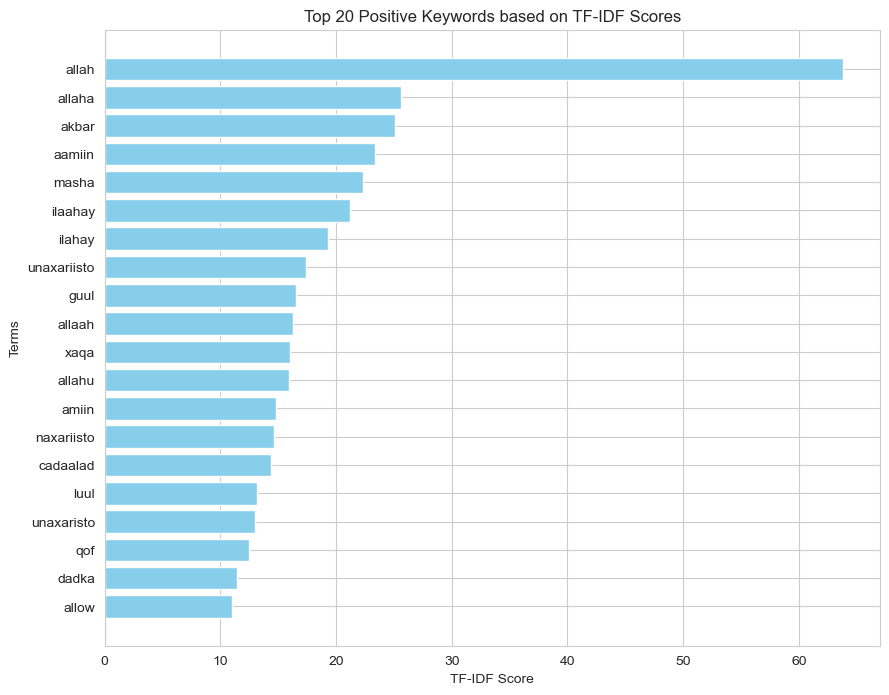

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Possitive-Wanaag']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(20)  # Top 20 terms

# Visualization
plt.figure(figsize=(10, 8))
plt.barh(df_tfidf_scores['Term'], df_tfidf_scores['Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Positive Keywords based on TF-IDF Scores')
plt.gca().invert_yaxis()  # Highest scores on top
plt.show()


# Task 15 - Let’s visualize the top negative keywords associated with the selected topic

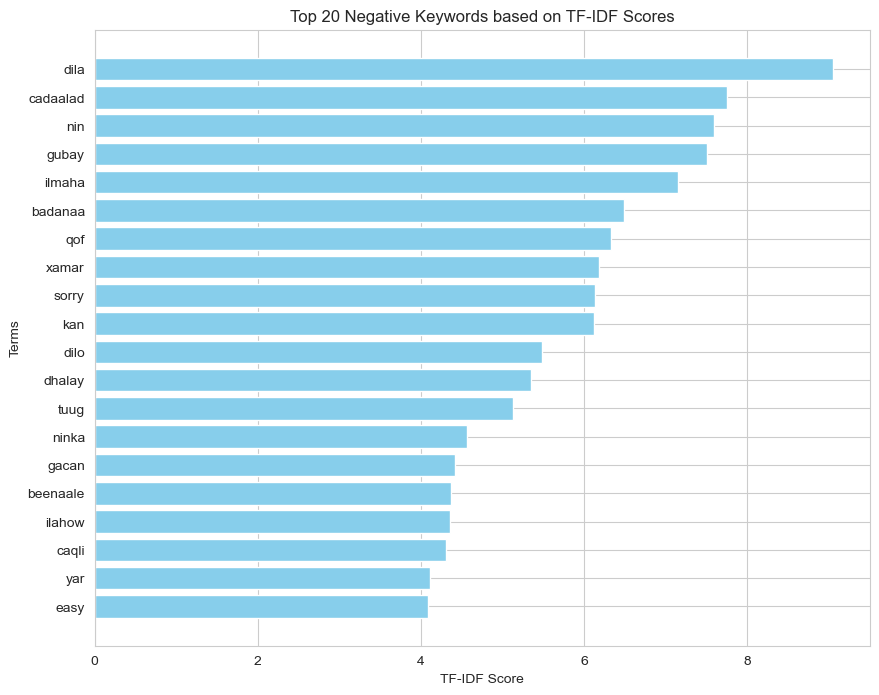

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for comments predicted as positive
positive_comments = df[df['Predicted Sentiment'] == 'Negative-Xumaan']['ProcessedComment']

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Adjust or remove stop_words as necessary
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_comments)

# Get feature names and tfidf scores
feature_names = tfidf_vectorizer.get_feature_names_out()
scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
tfidf_scores = dict(zip(feature_names, scores))

# Sort the scores in descending order
sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Convert to DataFrame for easy handling and visualization
df_tfidf_scores = pd.DataFrame(sorted_tfidf_scores, columns=['Term', 'Score']).head(20)  # Top 20 terms

# Visualization
plt.figure(figsize=(10, 8))
plt.barh(df_tfidf_scores['Term'], df_tfidf_scores['Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 20 Negative Keywords based on TF-IDF Scores')
plt.gca().invert_yaxis()  # Highest scores on top
plt.show()
